# Projet MADI 2019-2020 :

## Inférences Sum-Product, Max-Product et Loopy Belief Propagation dans des Factor Graphs

__**Étudiants**__ : Adil AMAR et Madina TRAORÉ

#### Imports

In [1]:
%reload_ext autoreload
%autoreload 2
from projet_madi import *

### Inférence dans les factors graphs

#### Représentation d'un Factor Graph

La classe FactorGraph permet de créer un Factor Graph à partir d'un réseau bayésien.

_Exemple d'utilisation de la classe FactorGraph :_

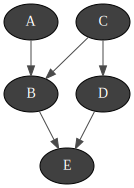

In [2]:
# On crée un réseau bayésien à l'aide de pyagrum
bn=gum.fastBN("A->B<-C->D->E<-B")
gnb.showBN(bn)

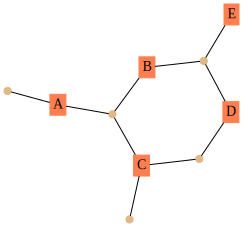

In [3]:
# On crée une instance de FactorGraph
fg=FactorGraph()
# On le construit
fg.build(bn)
# On peut ensuite visualiser le FactorGraph obtenu
fg.show()

#### Inférence Sum-Product dans des Factor Trees

La classe TreeSumProductInference permet de faire des inférences basées sur l'algorithme Sum-Product à partir d'un Factor Tree ( Factor Graph ayant une structure d'arbre ).

_Exemple d'utilisation de la classe TreeSumProductInference :_

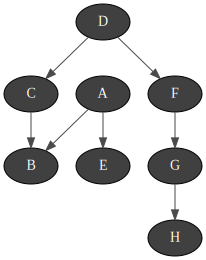

In [4]:
# On crée un réseau bayésien à l'aide de pyagrum ( le Factor Graph résultant doit être un arbre )
bn=gum.fastBN("A->B;D->C->B;A->E;D->F->G->H")
gnb.showBN(bn)

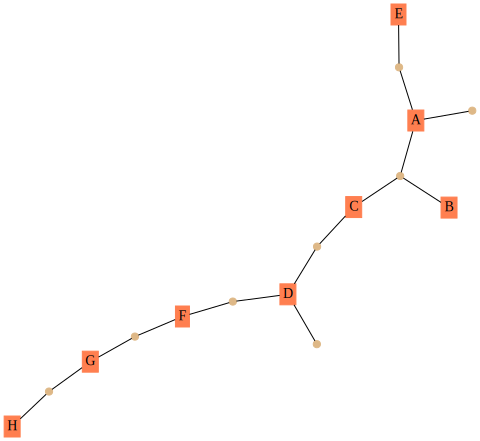

In [5]:
# On consrtuit le Factor Tree associé
fg=FactorGraph()
fg.build(bn)
fg.show()

In [6]:
# On crée une instance d'inférence
spi=TreeSumProductInference(fg)
# On effectue le calcul de tous les messages
spi.makeInference()

# On peut ensuite visualiser la distribution des variables du graphe et comparer avec une inférence exacte dans
# pyAgrum ( Lazy Propagation ici )
ie=gum.LazyPropagation(bn)
ie.makeInference()
variables_name_id = {}
for i in bn.nodes():
    variables_name_id[bn.variable(i).name()] = i
    
for variable in fg.variables:
    gnb.sideBySide(spi.posterior(variable),ie.posterior(variables_name_id[variable]), captions=['Inférence Sum-Product','Inférence avec pyagrum'])

Pour tous les tests effectués ( sur différents Factor Trees et différentes valeurs de facteurs i.e. différentes tables de probabilités conditionnelles ), nous constatons que les tables de probabilités retournées par TreeSumProductInference sont identiques à celles retournées par une inférence exacte dans pyagrum ( Lazy Propagation ici ).

#### Inférence Max-Product dans des Factor Trees

La classe TreeMaxProductInference permet de faire des inférences basées sur l'algorithme Max-Product à partir d'un Factor Tree ( Factor Graph ayant une structure d'arbre ).

_Exemple d'utilisation de la classe TreeMaxProductInference :_

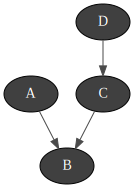

In [7]:
# On crée un réseau bayésien à l'aide de pyagrum ( le Factor Graph résultant doit être un arbre )
bn=gum.fastBN("A->B;D->C->B")
gnb.showBN(bn)

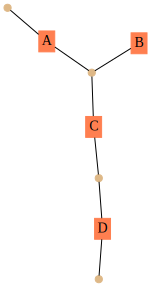

In [8]:
# On consrtuit le Factor Tree associé
fg=FactorGraph()
fg.build(bn)
fg.show()

In [9]:
# On crée une instance d'inférence
mpi=TreeMaxProductInference(fg)
# On effectue le calcul de tous les messages
mpi.makeInference()
# On peut ensuite visualiser le dictionnaire des valeurs des variables les plus probables ( pour le maximum a 
# posteriori )
mpi_argmax = mpi.argmax()

print("Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme Max-Product ):")
print(mpi_argmax)

# On vérifie que le dictionnaire retourné par TreeMaxProductInference est correct à l'aide de pyagrum
ie=gum.LazyPropagation(bn)
variables = []
for i in bn.nodes():
    variables.append(bn.variable(i).name())
variables = set(variables)
ie.addJointTarget(variables)
jointProbability = ie.jointPosterior(variables)
argmax = jointProbability.argmax()[0]

print("\nDictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ):")
print(argmax)

# On calcule le nombre d'erreurs ( i.e. le nombre de fois où la valeur la plus probable que l'on a trouvé avec 
# notre algorithme n'était pas la bonne )
nb_erreurs = 0
for name, value in argmax.items():
    if mpi_argmax[name] != value:
        nb_erreurs += 1
print("\nNombre d'erreurs :",nb_erreurs)

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme Max-Product ):
{'C': 0, 'A': 0, 'B': 0, 'D': 1}

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ):
{'C': 0, 'A': 0, 'B': 0, 'D': 1}

Nombre d'erreurs : 0


Pour tous les tests réalisés, le dictionnaire des variables les plus probables pour la probabilité jointe obtenu avec TreeMaxProductInference était, comme ici, identique à celui trouvé avec pyagrum.

#### Inférence Max-Sum dans des Factor Trees

La classe TreeMaxSumInference permet de faire des inférences basées sur l'algorithme Max-Sum à partir d'un Factor Tree ( Factor Graph ayant une structure d'arbre ).

_Exemple d'utilisation de la classe TreeMaxSumInference :_

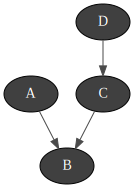

In [10]:
# On crée un réseau bayésien à l'aide de pyagrum ( le Factor Graph résultant doit être un arbre )
bn=gum.fastBN("A->B;D->C->B")
gnb.showBN(bn)

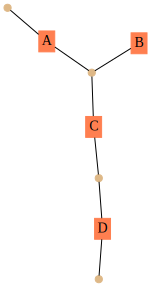

In [11]:
# On consrtuit le Factor Tree associé
fg=FactorGraph()
fg.build(bn)
fg.show()

In [12]:
# On crée une instance d'inférence
msi=TreeMaxSumInference(fg)
# On effectue le calcul de tous les messages
msi.makeInference() 
# On peut ensuite visualiser le dictionnaire des valeurs des variables pour le maximum a posteriori
msi_argmax = msi.argmax()

print("Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme Max-Sum ):")
print(msi_argmax)

# On vérifie que le dictionnaire retourné par TreeMaxSumInference est correct à l'aide de pyagrum
ie=gum.LazyPropagation(bn)
variables = []
for i in bn.nodes():
    variables.append(bn.variable(i).name())
variables = set(variables)
ie.addJointTarget(variables)
jointProbability = ie.jointPosterior(variables)
argmax = jointProbability.argmax()[0]

print("\nDictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ) :")
print(argmax)

# On calcule le nombre d'erreurs ( i.e. le nombre de fois où la valeur la plus probable que l'on a trouvé avec 
# notre algorithme n'était pas la bonne )
msi_argmax = msi.argmax()
nb_erreurs = 0
for name, value in argmax.items():
    if msi_argmax[name] != value:
        nb_erreurs += 1
print("\nNombre d'erreurs :",nb_erreurs)

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme Max-Sum ):
{'C': 0, 'A': 1, 'B': 1, 'D': 0}

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ) :
{'A': 1, 'C': 0, 'D': 0, 'B': 1}

Nombre d'erreurs : 0


Pour tous les tests réalisés, le dictionnaire des variables les plus probables pour la probabilité jointe obtenu avec TreeMaxSumInference était, comme ici, identique à celui trouvé avec pyagrum.

#### Inférence Loopy Belief Propagation pour l'algorithme Sum-Product dans des Factor Graphs

La classe LBPSumProductInference permet de faire des inférences approchées Loopy Belief Propagation avec l'algorithme Sum-Product non plus seulement sur des arbres mais sur tous types de Factor Graphs.

_Exemple d'utilisation de la classe LBPSumProductInference :_

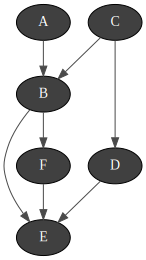

In [13]:
# On crée un réseau bayésien à l'aide de pyagrum
bn=gum.fastBN("A->B<-C->D->E<-B;B->F->E")
gnb.showBN(bn)

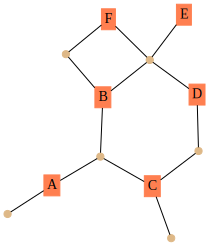

In [14]:
# On consrtuit le Factor Graph associé
fg=FactorGraph()
fg.build(bn)
fg.show()

In [15]:
# On crée une instance d'inférence
lbp_spi=LBPSumProductInference(fg)
# On effectue le calcul de tous les messages
lbp_spi.makeInference() 

# On compare avec une inférence LoopyBeliefPropagation de pyAgrum
lbp=gum.LoopyBeliefPropagation(bn)
lbp.makeInference()

# puis avec une inférence exacte dans pyAgrum ( Lazy Propagation ici )
lp=gum.LazyPropagation(bn)
lp.makeInference()

# Affichage
variables_name_id = {}
for i in bn.nodes():
    variables_name_id[bn.variable(i).name()] = i

for variable in fg.variables:
    gnb.sideBySide(lbp_spi.posterior(variable),lbp.posterior(variables_name_id[variable]),lp.posterior(variables_name_id[variable]), captions=['Inférence Loopy Belief Propagation Sum-Product','Inférence approchée avec pyagrum  (Loopy Belief Propagation)','Inférence exacte avec pyagrum (Lazy Propagation)'])

Nous constatons que notre algorithme Loopy Belief Propagation Sum-Product retourne exactement les mêmes tables de probabilité que l'algorithme Loopy Belief Propagation de pyagrum pour tous les tests effectués. En comparant leurs résultats ( ceux de Loopy Belief Propagation Sum-Product et Loopy Belief Propagation de pyagrum ) à ceux donnés par une inférence exacte dans pyagrum ( Lazy Propagation ) nous repérons néanmoins quelques erreurs de précision sur certaines variables ( erreur sur la variable E ici ). 

#### Inférence Loopy Belief Propagation pour l'algorithme Max-Sum dans des Factor Graphs

La classe LBPMaxSumInference permet de faire des inférences approchées Loopy Belief Propagation avec l'algorithme Max-Sum non plus seulement sur des arbres mais sur tous types de Factor Graphs.

_Exemple d'utilisation de la classe LBPMaxSumInference :_

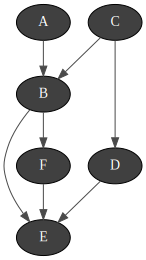

In [16]:
# On crée un réseau bayésien à l'aide de pyagrum
bn=gum.fastBN("A->B<-C->D->E<-B;B->F->E")
gnb.showBN(bn)

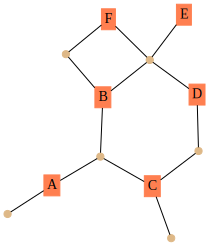

In [17]:
# On consrtuit le Factor Graph associé
fg=FactorGraph()
fg.build(bn)
fg.show()

In [18]:
# On crée une instance d'inférence
lbp_msi=LBPMaxSumInference(fg)
# On effectue le calcul de tous les messages
lbp_msi.makeInference() 
# On peut ensuite visualiser le dictionnaire des valeurs des variables pour le maximum a posteriori
lbp_msi_argmax = lbp_msi.argmax()

print("Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme Loopy Belief Propagation Max-Sum ):")
print(lbp_msi_argmax)

# On vérifie que le dictionnaire retourné par LBPMaxSumInference est correct à l'aide de pyagrum
ie=gum.LazyPropagation(bn)
variables = []
for i in bn.nodes():
    variables.append(bn.variable(i).name())
variables = set(variables)
ie.addJointTarget(variables)
jointProbability = ie.jointPosterior(variables)
argmax = jointProbability.argmax()[0]

print("\nDictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ) :")
print(argmax)

# On calcule le nombre d'erreurs ( i.e. le nombre de fois où la valeur la plus probable que l'on a trouvé avec 
# notre algorithme n'était pas la bonne )
nb_erreurs = 0
for name, value in argmax.items():
    if lbp_msi_argmax[name] != value:
        nb_erreurs += 1
print("\nNombre d'erreurs :",nb_erreurs)

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme Loopy Belief Propagation Max-Sum ):
{'B': 1, 'A': 0, 'C': 0, 'E': 0, 'D': 0, 'F': 0}

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ) :
{'B': 1, 'D': 0, 'F': 0, 'E': 0, 'C': 0, 'A': 0}

Nombre d'erreurs : 0


Pour tous les tests réalisés, le dictionnaire des variables les plus probables pour la probabilité jointe obtenu avec LBPMaxSumInference était, comme ici, identique à celui trouvé avec pyagrum.

#### Intégration d'observations sur une ou plusieurs variables

Si l'on souhaite ajouter des observations sur une ou plusieurs variables ( ex : {"A":1,"E":0} ) du Factor Graph, on utilise la méthode addEvidence() de la classe Factor Graph.

_Exemple d'utilisation de la méthode addEvidence() :_

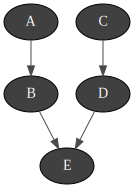

In [19]:
# On crée un réseau bayésien à l'aide de pyagrum
bn=gum.fastBN("A->B;C->D->E<-B")
gnb.showBN(bn)

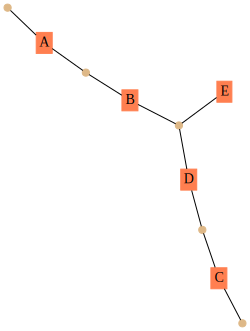

In [20]:
# On consrtuit le Factor Tree associé
fg=FactorGraph()
fg.build(bn)
fg.show()

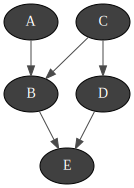

In [21]:
# On crée un réseau bayésien à l'aide de pyagrum
bn=gum.fastBN("A->B<-C->D->E<-B")
gnb.showBN(bn)

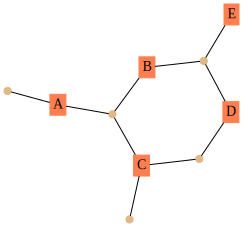

In [22]:
# On consrtuit le Factor Graph associé
fg=FactorGraph()
fg.build(bn)
fg.show()

In [23]:
# On crée une instance d'inférence ( TreeSumProductInference ou LBPSumProductInference )
#spi=TreeSumProductInference(fg)
spi=LBPSumProductInference(fg)
evidence = {'B':0,'C':1}
spi.addEvidence(evidence)
# On effectue le calcul de tous les messages
spi.makeInference()

# On compare avec une inférence LoopyBeliefPropagation de pyAgrum
lbp=gum.LoopyBeliefPropagation(bn)
lbp.setEvidence(evidence)
lbp.makeInference()

# puis avec une inférence exacte dans pyAgrum ( Lazy Propagation ici )
lp=gum.LazyPropagation(bn)
lp.setEvidence(evidence)
lp.makeInference()

# Affichage
variables_name_id = {}
for i in bn.nodes():
    variables_name_id[bn.variable(i).name()] = i

for variable in fg.variables:
    gnb.sideBySide(spi.posterior(variable),lbp.posterior(variables_name_id[variable]),lp.posterior(variables_name_id[variable]), captions=['Inférence avec notre algorithme (Sum-Product ou Loopy Belief Propagation Sum-Product)','Inférence approchée avec pyagrum  (Loopy Belief Propagation)','Inférence exacte avec pyagrum (Lazy Propagation)'])

Pour tous les tests effectués ( pour diverses observations sur les variables, sur différents Factor Trees et pour différentes valeurs de facteurs i.e. différentes tables de probabilités conditionnelles ), nous constatons que les tables de probabilités retournées par TreeSumProductInference et LBPSumProductInference sont identiques à celles retournées par une inférence Loopy Belief Propagation de pyagrum. En comparant les résultats de LBPSumProductInference et Loopy Belief Propagation de pyagrum ( identiques ) à ceux donnés par une inférence exacte dans pyagrum ( Lazy Propagation ici ) nous repérons néanmoins quelques erreurs de précision sur certaines variables. Les résultats obtenus avec TreeSumProductInference sont, eux, toujours identiques à ceux obtenus avec Lazy Propagation.

In [24]:
evidence = {'E':1,'B':0,'C':1} # observations sur une ou plusieurs variables
# On crée une instance d'inférence ( TreeMaxProductInference, TreeMaxSumInference ou LBPMaxSumInference )
#mapi=TreeMaxProductInference(fg)
#mapi=TreeMaxSumInference(fg)
mapi=LBPMaxSumInference(fg)
mapi.addEvidence(evidence)
# On effectue le calcul de tous les messages
mapi.makeInference()
print("Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme ):")
# On peut ensuite visualiser le dictionnaire des valeurs des variables pour le maximum a posteriori
print(mapi.argmax())

# Afin de vérifier nos résultats par la suite, on détermine le dictionnaire des valeurs des variables les plus
# probables pour la probabilité jointe en prenant en compte les observations données à l'aide de pyagrum
ie=gum.LazyPropagation(bn)
variables = []
for i in bn.nodes():
    variables.append(bn.variable(i).name())
variables = set(variables)
ie.addJointTarget(variables)
ie.setEvidence(evidence)
jointProbability = ie.jointPosterior(variables)
argmax = jointProbability.argmax()[0]

print("\nDictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ) :")
print(argmax)
mapi_argmax = mapi.argmax()

# On calcule le nombre d'erreurs ( i.e. le nombre de fois où la valeur la plus probable que l'on a trouvé avec 
# notre algorithme n'était pas la bonne )
nb_erreurs = 0
for name, value in argmax.items():
    if mapi_argmax[name] != value:
        nb_erreurs += 1
print("\nNombre d'erreurs :",nb_erreurs)

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( obtenu avec notre algorithme ):
{'B': 0, 'A': 1, 'C': 1, 'E': 1, 'D': 0}

Dictionnaire des valeurs des variables les plus probables pour la probabilité jointe ( vérification ) :
{'E': 1, 'C': 1, 'B': 0, 'A': 1, 'D': 0}

Nombre d'erreurs : 0


Pour tous les tests réalisés, le dictionnaire des variables les plus probables pour la probabilité jointe obtenu avec TreeMaxProductInference, TreeMaxSumInference ou LBPMaxSumInference était identique à celui trouvé avec pyagrum.

### Application : code LowDensityParityCheck 

#### Représentation d'un code LDPC

_Exemple d'utilisation de la méthode buildLDPC() :_

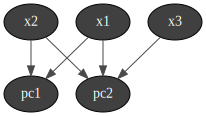

In [25]:
ldpc = buildLDPC(bits=['x1','x2','x3'],parity={'pc1':['x1','x2'],'pc2':['x1','x2','x3']})
gnb.showBN(ldpc)

#### Canal Binaire à Effacement

_Exemple d'utilisation de la méthode CBE() :_

In [26]:
message={"x1":1,"x3":1,'pc2':0}
bm = CBE(ldpc,message)
print("Si l'on a reçu le message partiel suivant :", message)
print("\nLes bits manquants sont :", bm)

Si l'on a reçu le message partiel suivant : {'x1': 1, 'x3': 1, 'pc2': 0}

Les bits manquants sont : {'pc1': 1, 'x2': 0}


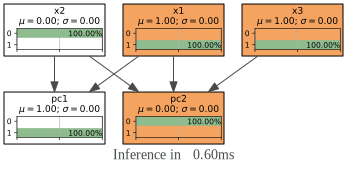

In [27]:
# Pour avoir un rendu plus visuel
gnb.showInference(ldpc,evs=message) # inférence Lazy Propagation avec evidence sur le réseau bayésien ldpc

#### Noisy LDPC

_Exemple d'utilisation de la méthode NoisyLDPC() :_

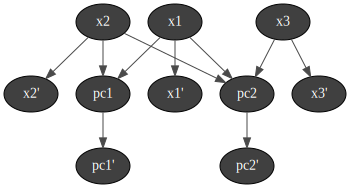

In [28]:
ldpc = buildLDPC(bits=['x1','x2','x3'],parity={'pc1':['x1','x2'],'pc2':['x1','x2','x3']})
p = 0.2 # probabilité d'erreur sur chaque bit
nldpc = NoisyLDPC(ldpc,p)
gnb.showBN(nldpc)

In [29]:
gnb.sideBySide(nldpc.cpt("x1'"), captions=["Probabilité de recevoir x' sachant que x a été envoyé ( avec une probabilité d'erreur p ="+str(p)+" )"])

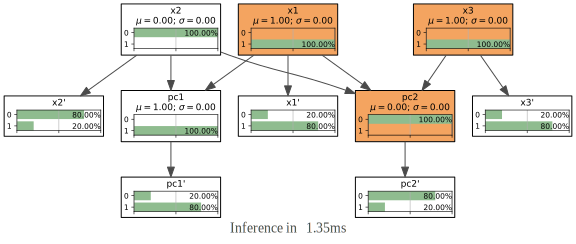

In [30]:
gnb.showInference(nldpc,evs={'x1':1,'x3':1,'pc2':0}) # inférence Lazy Propagation avec evidence sur le réseau
                                                     # bayésien nldpc

#### Canal Binaire Symétrique

_Exemple d'utilisation de la méthode CBS() :_

In [31]:
message = {"x1'":1,"x2'":0,"x3'":1,"pc2'":0,"pc1'":1}
mp_message = CBS(nldpc,message)
print("Si l'on a reçu le message suivant :", message, "\n\nLe message réellement envoyé le plus probable est :", mp_message)

Si l'on a reçu le message suivant : {"x1'": 1, "x2'": 0, "x3'": 1, "pc2'": 0, "pc1'": 1} 

Le message réellement envoyé le plus probable est : {'x1': 1, 'pc1': 1, 'x2': 0, 'pc2': 0, 'x3': 1}


#### Analyse

L'architecture des codes LDPC n'étant pas contrainte, on a un nombre d'arêtes dans le LDPC qui peut être égal à m*k ( avec m le nombre de bits et k le nombre de contraintes de parité ) si chaque bit du message est relié a chaque bit de contrainte. 

La robustesse du LDPC est améliorée quand :  
- Le ratio des (bits k / bits m) est plus grand  
- Les sous-ensembles recouverts par les bits de parité sont plus "linéairement indépendantes". L'information donné par chaque de bit de parité est distinct.

Concernant le NoisyLDPC, il n'engendre pas de contrainte majeure en terme de complexité temporelle et de mémoire puisqu'on se contente de dupliquer les noeuds par deux et il entraîne une amélioration de la vérification des messages que l'on considère valides.

Le NoisyLDPC s'améliore plus la probabilité d'erreur p est basse mais à partir d'un certain seuil de p, le nombre d'erreurs est trop grand pour que la fonction soit utile et que le message ait une bonne probabilité d'être valide. Néanmoins, cette perte d'efficacité peut être modérée par le nombre de bits k de vérification et la structure du LDPC.